#Submission Machine Learning Terapan - Sistem Rekomendasi
**Nama : Aisy Al Fawwaz**

# 1. Menginstal library opendatasets

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Mengimpor library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np 
import opendatasets as od
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
import plotly.io as pio
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

#3. Mengunduh Dataset dari platfrom kaggle

In [3]:
od.download('https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fawwaz11
Your Kaggle Key: ··········


100%|██████████| 167k/167k [00:00<00:00, 7.92MB/s]

# 4. Data Understanding

## 3.1 Menampilkan isi dari dataset dengan library pandas

In [4]:
movies_meta_data = pd.read_csv('/content/imdb-most-popular-films-and-series/imdb.csv')

movies_meta_data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


### 3.2 Menampilkan keterangan jpanjang data unique judul film

In [5]:
print(len(movies_meta_data.Name.unique()))

4820


### 3.3 Menampilkan keterangan kolom dataset

In [8]:
movies_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   object
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   object
 6   Type         6178 non-null   object
 7   Certificate  6178 non-null   object
 8   Episodes     6178 non-null   object
 9   Nudity       6178 non-null   object
 10  Violence     6178 non-null   object
 11  Profanity    6178 non-null   object
 12  Alcohol      6178 non-null   object
 13  Frightening  6178 non-null   object
dtypes: int64(1), object(13)
memory usage: 675.8+ KB


### 3.4 Menampilkan Daftar Genre pada dataset

In [9]:
print(movies_meta_data.Genre.unique())

['Action, Adventure, Thriller' 'Crime, Drama, Thriller' 'Crime, Drama'
 'Action, Adventure, Sci-Fi' 'Action, Adventure, Drama'
 'Comedy, Drama, Sport' 'Action, Adventure, Comedy'
 'Animation, Action, Adventure' 'Comedy, Drama' 'Drama, Horror, Thriller'
 'Crime, Drama, Mystery' 'Drama, Sci-Fi' 'Comedy, Crime, Drama' 'Comedy'
 'Drama, Romance' 'Action, Drama, History' 'Action, Fantasy, Mystery'
 'Action, Adventure, Fantasy' 'Drama' 'Action, Horror, Mystery'
 'Crime, Drama, Fantasy' 'Horror, Thriller' 'Horror, Mystery, Thriller'
 'Crime, Horror, Mystery' 'Drama, Mystery, Thriller'
 'Action, Crime, Drama' 'Biography, Drama, Musical'
 'Drama, Mystery, Sci-Fi' 'Action, Drama, Sci-Fi'
 'Animation, Adventure, Comedy' 'Comedy, Fantasy, Horror'
 'Drama, Horror, Sci-Fi' 'Biography, Crime, Drama' 'Crime'
 'Drama, Fantasy, Horror' 'Action, Adventure, Crime'
 'Drama, Horror, Mystery' 'Comedy, Family, Fantasy' 'Action, Drama'
 'Crime, Drama, Romance' 'Drama, Western' 'Comedy, Romance'
 'Comedy, Crime

### 3.5 menghitung panjang data pada variabel Genre

In [10]:
print(len(movies_meta_data.Genre.unique()))

377


### 3.6 Memuat deskripsi statistik pada setiap kolom dataframe 

In [11]:
# Memuat deskripsi setiap kolom dataframe
movies_meta_data.describe()

,Date
count,6178.000000
mean,2005.952574
std,15.910248
min,1922.000000
25%,1998.000000
50%,2011.000000
75%,2019.000000
max,2023.000000


In [12]:
# Menghitung jumlah data kosong 
movies_meta_data.isnull().sum()

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Episodes       0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

### 3.7 membuat variabel baru untuk dataset

In [13]:
# Memuat dataset ke dalam variable baru
movie = movies_meta_data.Name.unique()

# Mengurutkan data dan menghapus data yang sama
movie = np.sort(np.unique(movie))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie))

Jumlah seluruh data movie berdasarkan movieId:  4820


In [14]:
movie_info = pd.concat([movies_meta_data])

movie_info

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


### 3.8 Visualisasi jumlah kata dengan frekuensi tertinggi pada kolom Genre

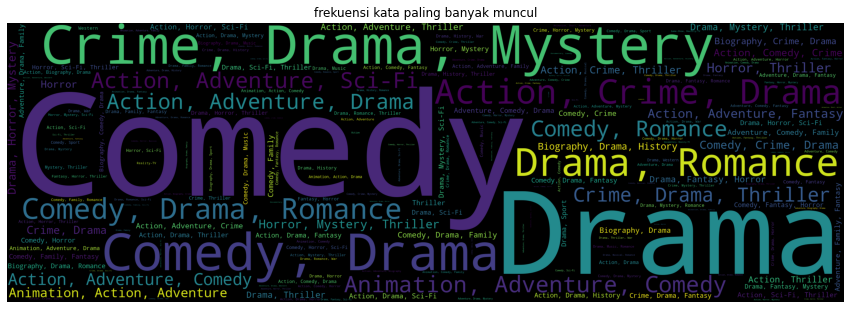

In [15]:
word_could_dict = Counter(movies_meta_data['Genre'].tolist())
frekuensi_kata = WordCloud(width = 3000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(frekuensi_kata)
plt.title('frekuensi kata paling banyak muncul')
plt.axis("off")
plt.show()

# 4. Data Preparation

### 4.1 Memilih kolom berdasarkan data yang dibutuhkan dalam membuat sistem content based learning berdasarkan genre yaitu judul dan genre

In [16]:
judul_film = movies_meta_data['Name'].tolist()
genre_film = movies_meta_data['Genre'].tolist()

print(len(judul_film))
print(len(genre_film))

6178
6178


### 4.2 Membuat data menjadi bentuk dataframe

In [17]:
data = pd.DataFrame({
    'judul': judul_film,
    'genre': genre_film
})

data.head(5)

,judul,genre
0,No Time to Die,"Action, Adventure, Thriller"
1,The Guilty,"Crime, Drama, Thriller"
2,The Many Saints of Newark,"Crime, Drama"
3,Venom: Let There Be Carnage,"Action, Adventure, Sci-Fi"
4,Dune,"Action, Adventure, Drama"


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   6178 non-null   object
 1   genre   6178 non-null   object
dtypes: object(2)
memory usage: 96.7+ KB


### 4.3 Memuat banyak data dari setiap unique value berdasarkan genre

In [19]:
value_genre = pd.DataFrame(data['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
print(len(value_genre))
pd.options.display.max_colwidth = 500
value_genre

377


,genre,count
0,Comedy,268
1,Drama,259
2,"Crime, Drama, Mystery",220
3,"Comedy, Drama",199
4,"Drama, Romance",189
...,...,...
372,"Action, Thriller, War",1
373,"Comedy, Crime, Musical",1
374,"Short, Drama, Romance",1
375,Animation,1


In [ ]:
# membuat data string tanda strip '-' pada variable data dihapus
data = data[data.genre != '-']

### Melihat kembali Jenis-Jenis Genre yang terdapat pada data

In [20]:
data.genre.unique()

array(['Action, Adventure, Thriller', 'Crime, Drama, Thriller',
       'Crime, Drama', 'Action, Adventure, Sci-Fi',
       'Action, Adventure, Drama', 'Comedy, Drama, Sport',
       'Action, Adventure, Comedy', 'Animation, Action, Adventure',
       'Comedy, Drama', 'Drama, Horror, Thriller',
       'Crime, Drama, Mystery', 'Drama, Sci-Fi', 'Comedy, Crime, Drama',
       'Comedy', 'Drama, Romance', 'Action, Drama, History',
       'Action, Fantasy, Mystery', 'Action, Adventure, Fantasy', 'Drama',
       'Action, Horror, Mystery', 'Crime, Drama, Fantasy',
       'Horror, Thriller', 'Horror, Mystery, Thriller',
       'Crime, Horror, Mystery', 'Drama, Mystery, Thriller',
       'Action, Crime, Drama', 'Biography, Drama, Musical',
       'Drama, Mystery, Sci-Fi', 'Action, Drama, Sci-Fi',
       'Animation, Adventure, Comedy', 'Comedy, Fantasy, Horror',
       'Drama, Horror, Sci-Fi', 'Biography, Crime, Drama', 'Crime',
       'Drama, Fantasy, Horror', 'Action, Adventure, Crime',
       'D

### 4.3 Melakukan drop pada judul film yg double, dan berhasil menghapus beberapa judul

In [21]:
data = data.drop_duplicates('judul')
len(data)

4820

**4.4 Melakukan indeks ulang pada data agar penomoran dilakukan berurutan**

In [23]:
data.reset_index()
data.head()

,judul,genre
0,No Time to Die,"Action, Adventure, Thriller"
1,The Guilty,"Crime, Drama, Thriller"
2,The Many Saints of Newark,"Crime, Drama"
3,Venom: Let There Be Carnage,"Action, Adventure, Sci-Fi"
4,Dune,"Action, Adventure, Drama"


### 4.5 Memasukkan nilai data masing-masing kolom ke dalam variabel baru

In [24]:
judul = data['judul'].tolist()
genre = data['genre'].tolist()

print(len(judul))
print(len(genre))

4820
4820


In [25]:
# mengecek ulang data yg dimasukkan ke dalam variable baru
data = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
data

,judul,genre
0,No Time to Die,"Action, Adventure, Thriller"
1,The Guilty,"Crime, Drama, Thriller"
2,The Many Saints of Newark,"Crime, Drama"
3,Venom: Let There Be Carnage,"Action, Adventure, Sci-Fi"
4,Dune,"Action, Adventure, Drama"
...,...,...
4815,The Human Centipede II (Full Sequence),Horror
4816,Double Indemnity,"Crime, Drama, Film-Noir"
4817,Before the Devil Knows You're Dead,"Crime, Drama, Thriller"
4818,Queen Bees,"Comedy, Drama, Romance"


## 4.6 Proses Data


### 4.6.1 Membangun model rekomendasi berdasarkan kesamaan genre

In [26]:
# Inisialisasi CountVectorizer
tf = CountVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(genre) 

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fi', 'film', 'game',
       'history', 'horror', 'music', 'musical', 'mystery', 'news', 'noir',
       'reality', 'romance', 'sci', 'short', 'show', 'sport', 'talk',
       'thriller', 'tv', 'war', 'western'], dtype=object)

### 4.6.2 Melakukan Proses pelatihan pada model dan melihat ukuran matriks 

In [27]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(genre) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(4820, 31)

### 4.6.3 Mengubah vektor ke dalam bentuk matrix

In [28]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]])

### 4.6.4 Melihat Daftar jumlah film berdasarkan genre dan melihat korelasi nya yg diperlihatkan dalam bentuk matrix

In [29]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=data.judul
).sample(22, axis=1).sample(10, axis=0)

,thriller,show,comedy,family,musical,news,fi,western,history,animation,...,war,music,short,crime,biography,horror,drama,adventure,film,tv
judul,,,,,,,,,,,,,,,,,,,,,
Outside the Wire,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Road to Perdition,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Medici,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
This Is 40,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ai no korîda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Meet the Parents,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Burning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Cape Fear,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
The Hunger Games: Mockingjay - Part 2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 5 Modeling

### 5.1 Melatih Model dengan cosine similarity

In [31]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.33333333, 0.        , ..., 0.33333333, 0.        ,
        0.57735027],
       [0.33333333, 1.        , 0.81649658, ..., 1.        , 0.33333333,
        0.28867513],
       [0.        , 0.81649658, 1.        , ..., 0.81649658, 0.40824829,
        0.        ],
       ...,
       [0.33333333, 1.        , 0.81649658, ..., 1.        , 0.33333333,
        0.28867513],
       [0.        , 0.33333333, 0.40824829, ..., 0.33333333, 1.        ,
        0.        ],
       [0.57735027, 0.28867513, 0.        , ..., 0.28867513, 0.        ,
        1.        ]])

### 5.2 tahap ini menampilkan matriks kesamaan setiap judul dengan menampilkan judul film dalam 10 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [32]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul'], columns=genre)
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (4820, 4820)


,"Crime, Drama, Horror","Fantasy, Horror","Action, Drama, History","Action, Adventure, Drama","Horror, Mystery, Thriller","Action, Drama, Thriller","Comedy, Romance","Comedy, Romance","Crime, Mystery, Drama","Crime, Drama, Mystery"
judul,,,,,,,,,,
Gwendoline,0.000000,0.000000,0.333333,0.666667,0.000000,0.333333,0.408248,0.408248,0.000000,0.000000
Menace II Society,0.666667,0.000000,0.333333,0.333333,0.333333,0.666667,0.000000,0.000000,0.666667,0.666667
Outbreak,0.333333,0.000000,0.666667,0.666667,0.333333,1.000000,0.000000,0.000000,0.333333,0.333333
There's Something About Mary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
Fear and Loathing in Las Vegas,0.333333,0.000000,0.333333,0.666667,0.000000,0.333333,0.408248,0.408248,0.333333,0.333333
Critical Role,0.000000,0.500000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Antichrist,0.666667,0.408248,0.333333,0.333333,0.666667,0.666667,0.000000,0.000000,0.333333,0.333333
Yeoshingangrim,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.816497,0.816497,0.333333,0.333333
The Edge of Seventeen,0.408248,0.000000,0.408248,0.408248,0.000000,0.408248,0.500000,0.500000,0.408248,0.408248


# 6. Evaluasi Model

### 6.1 Pada tahap ini dilakukan indikasi dan diperlihatkan judul film berdasarkan urutan dari data

In [33]:
indices = pd.Series(index = data['judul'], data = data.index).drop_duplicates()
indices.head()

judul
No Time to Die                 0
The Guilty                     1
The Many Saints of Newark      2
Venom: Let There Be Carnage    3
Dune                           4
dtype: int64

### 6.2 Membuat fungsi untuk memanggil 5 rekomendasi film berdasarkan judul yang di input

In [40]:
def movie_recommendations(judul, cosine_sim = cosine_sim,items=data[['judul','genre']]):
    # Mengambil indeks dari judul film yang telah didefinisikan sebelumnnya
    idx = indices[judul]
    
    # Mengambil skor kemiripan dengan semua judul film 
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    
    # Mengambil 5 skor kemiripan dari 0-5 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput
    sim_scores = sim_scores[0:5]
    
    # Mengambil judul film dari skor kemiripan
    movie_indices = [i[0] for i in sim_scores]
    
    # Mengembalikan 20 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 20 rekomendasi film tersebut
    return pd.DataFrame(data['judul'][movie_indices]).merge(items)

In [41]:
# mengecek judul film di dalam data
data[data.judul.eq('King Kong')]

,judul,genre
2028,King Kong,"Action, Adventure, Drama"


## 6.3 Mencoba menampilkan 5 rekomendasi film dari judul yang telah di input menggunakan fungsi movie_recomendations

In [44]:
recomendation = pd.DataFrame(movie_recommendations('King Kong'))
recomendation

,judul,genre
0,Dune,"Action, Adventure, Drama"
1,House of the Dragon,"Action, Adventure, Drama"
2,Game of Thrones,"Action, Adventure, Drama"
3,Y: The Last Man,"Action, Adventure, Drama"
4,Eternals,"Action, Adventure, Drama"


In [45]:
# menghitung banyaknya data genre pada hasil rekomendasi yg dilakukan 
value = pd.DataFrame(recomendation['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
value.head()

,genre,count
0,"Action, Adventure, Drama",5


### 6.4 Melakukan perhitungan dengan menggunakan metrik precision untuk melihat akurasi

In [46]:
TP = 5 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%
